# Problem Statement-
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

In [156]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the train data

In [157]:
#Read csv file and convert into Dataframe
data_train=pd.read_excel(r'D:\DataTrained\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Observation-

The features in the above data set are-

- Airline     

- Date_of_Journey    

- Source 

- Destination 

- Route 

- Dep Time

- Arrival_Time

- Duration

- Total stops

- Additional info

The label in the given dataset is-

- Price

In [158]:
#shape of file
data_train.shape

(10683, 11)

In [159]:
# Checking for data types of the columns
data_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [160]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [161]:
# Checking for null values in object datatype columns

for column in data_train:
    data_train[column]=data_train[column].replace(" ",np.nan)

In [162]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [163]:
#As it is for one row lets drop the null value row
data_train=data_train.dropna()

In [164]:
# Checking for null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [165]:
#shape of file
data_train.shape

(10682, 11)

# Visualization of the Data and Encoding object data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


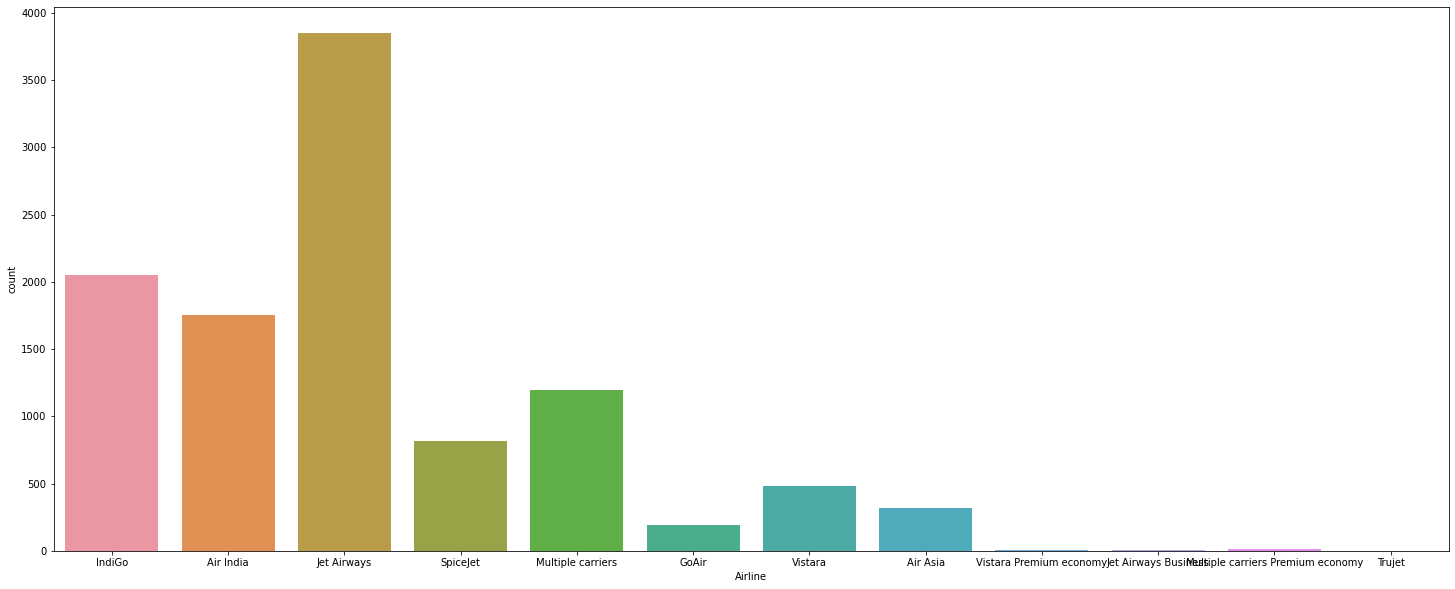

In [166]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Airline", data=data_train)
print(data_train["Airline"].value_counts())

# 
3849 are Jet Airways flights, 2053 are Indigo flights, 1751 are Air India flights, 1196 are Multple carriers, 818 are spice jet flights, 479 are vistara flights, 319 are Ais Asia flights, 194 are GoAir flights, 13 are Multiple carriers Premium economy, 6 are Jet Airways Business, 3 are Vistara Premium Economy, 1 are Trujet flight   

In [167]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Airline"])
data_train["Airline"]=df

# 
The data is encoded as follows-

- 0 - Air Asia
- 1 - Air India
- 2 - GoAir
- 3 - IndiGo
- 4 - Jet Airways 
- 5 - Jet Airways Business
- 6 - Multiple carriers
- 7 - Multiple carriers Premium economy
- 8 - SpiceJet
- 9 - Trujet
- 10- Vistara 
- 11- Vistara Premium economy

In [186]:
data_train['Date_of_Journey']=pd.to_datetime(data_train['Date_of_Journey'])

In [187]:
#Storing date and month in separate column
#As the year is 2019, it need not be stored
data_train['Date']=data_train['Date_of_Journey'].dt.day
data_train['Month']=data_train['Date_of_Journey'].dt.month

In [188]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,4,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,1,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,4,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,10,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [ ]:
#As the date of journey is stored in date and month columns, date of journey is deleted
data_train=data_train.drop(columns=["Date_of_Journey"])

In [ ]:
data_train.Date.plot(kind='hist')

# 
The maximum flights are operated in the 1st week of the month

In [ ]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Source", data=data_train)
print(data_train["Source"].value_counts())

# 
4536 flights fly from Delhi, 2871 flights fly from Kolkata, 2197 flights from Banglore, 697 flights fly from Mumbai and 381 flights fly from Chennai

In [ ]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Source"])
data_train["Source"]=df

# 
The data is encoded as follows-

- 0 - Banglore
- 1 - Chennai
- 2 - Delhi
- 3 - Kolkata
- 4 - Mumbai

In [ ]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Destination", data=data_train)
print(data_train["Destination"].value_counts())

# 
4536 flights are flying to Cochin, 2871 flights are flying to Banglore, 1265 flights are flying to Delhi, 932 flights fly to New Delhi, 697 flights fly to Hyderabad, 381 flights fly to Kolkata       

In [ ]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data_train["Destination"])
data_train["Destination"]=df


The data is encoded as follows-

- 0 - Banglore
- 1 - Cochin
- 2 - Delhi
- 3 - Hyderabad
- 4 - Kolkata
- 5 - New Delhi

In [ ]:
#Replace the values of destination, so that source and destination have different numbers
data_train["Destination"]=data_train["Destination"].replace(0,10)
data_train["Destination"]=data_train["Destination"].replace(1,11)
data_train["Destination"]=data_train["Destination"].replace(2,12)
data_train["Destination"]=data_train["Destination"].replace(3,13)
data_train["Destination"]=data_train["Destination"].replace(4,14)
data_train["Destination"]=data_train["Destination"].replace(5,15)

# 
The data is now encoded as follows-

- 10 - Banglore
- 11 - Cochin
- 12 - Delhi
- 13 - Hyderabad
- 14 - Kolkata
- 15 - New Delhi